In [1]:
# Versão do python

from platform import python_version
print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.8.8


In [2]:
# Importação das bibliotecas 

import pandas as pd # Pandas carregamento csv
import numpy as np # Numpy para carregamento cálculos em arrays multidimensionais

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

Loading BokehJS ...

In [3]:
# NLTK para NLP
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

plotly    : 5.6.0
watermark : 2.3.0
re        : 2.2.1
seaborn   : 0.11.1
nltk      : 3.6.1
pandas    : 1.2.4
numpy     : 1.20.1
matplotlib: 3.3.4



In [5]:
# Configuração para os gráficos largura e layout dos graficos

plt.style.use('seaborn-darkgrid')
sns.set_style("whitegrid")

In [6]:
# Carregando a base de dados
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [7]:
df_train.head()

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   
3    The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4    Fourier-transform infra-red (FTIR) spectra o...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [8]:
df_test.head()

ID                                              TITLE  \
0  20973  Closed-form Marginal Likelihood in Gamma-Poiss...   
1  20974  Laboratory mid-IR spectra of equilibrated and ...   
2  20975         Case For Static AMSDU Aggregation in WLANs   
3  20976  The $Gaia$-ESO Survey: the inner disk intermed...   
4  20977  Witness-Functions versus Interpretation-Functi...   

                                            ABSTRACT  
0    We present novel understandings of the Gamma...  
1    Meteorites contain minerals from Solar Syste...  
2    Frame aggregation is a mechanism by which mu...  
3    Milky Way open clusters are very diverse in ...  
4    Proving that a cryptographic protocol is cor...

In [9]:
# Número de linhas e colunas
df_train.shape

(20972, 9)

In [10]:
# Verificando informações das variaveis
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    20972 non-null  int64 
 1   TITLE                 20972 non-null  object
 2   ABSTRACT              20972 non-null  object
 3   Computer Science      20972 non-null  int64 
 4   Physics               20972 non-null  int64 
 5   Mathematics           20972 non-null  int64 
 6   Statistics            20972 non-null  int64 
 7   Quantitative Biology  20972 non-null  int64 
 8   Quantitative Finance  20972 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


In [11]:
# Tipo dos dados
df_train.dtypes

ID                       int64
TITLE                   object
ABSTRACT                object
Computer Science         int64
Physics                  int64
Mathematics              int64
Statistics               int64
Quantitative Biology     int64
Quantitative Finance     int64
dtype: object

In [12]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(df_train.shape[0]))
print("Números de colunas: {}" .format(df_train.shape[1]))

Números de linhas: 20972
Números de colunas: 9


In [13]:
train_text = df_train["ABSTRACT"]
test_text = df_test["ABSTRACT"]

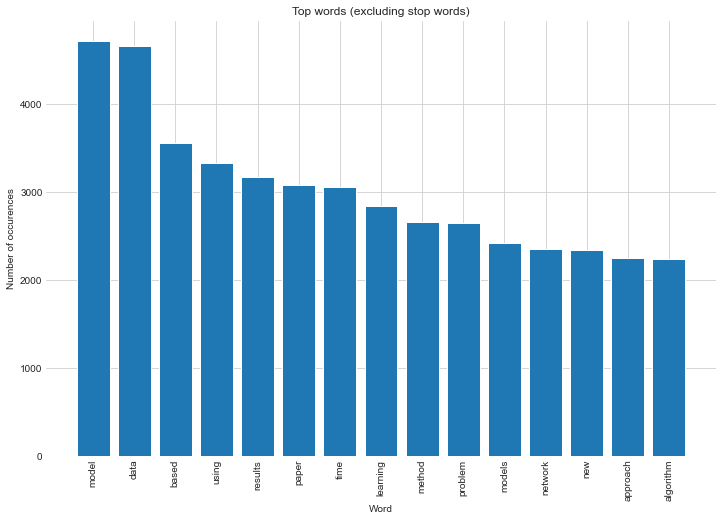

range(0, 15)


In [14]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
words, word_val = get_top_n_words(n_top_words=15, count_vectorizer=cv, text_data=test_text)

In [15]:
#Making a class for both tokenization and lemmatization
lemm = nltk.WordNetLemmatizer()
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))
    
    
# Storing all training text in a list
text = list(train_text)

# Calling the overwritten count vectorizer
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, min_df=2, stop_words='english', 
                                     decode_error='ignore')
tf = tf_vectorizer.fit_transform(text)

In [21]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

In [22]:
#number of topics
n_topics=10

In [23]:
#Creating an LDA instance
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online', 
                                learning_offset=50., random_state=0, verbose =0)
lda.fit(tf)

#Making an LDA topic matrix of the corpus
lda_topic_matrix = lda.fit_transform(tf)

In [24]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [26]:
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

# Getting the categories and counts from the lda model
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [27]:
# Function to get top words from each category
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)
        
        
        top_words = []
        for topic in top_word_indices:
            topic_words = []
            for index in topic:
                temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
                temp_word_vector[:,index] = 1
                the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
                topic_words.append(the_word.encode('ascii').decode('utf-8'))
                top_words.append(" ".join(topic_words))
                
                return top_words

In [28]:
# Printing words from each topic
top_n_words = get_top_n_words(20, lda_keys, tf, tf_vectorizer)

for i in range(len(top_n_words)):
    print("Topic {}:\n ".format(i), top_n_words[i] + "\n")

Topic 0:
  energy power paper model market price cost resource system network based high technology time data result user performance computing design

Topic 1:
  result problem function space graph paper equation time mathbb set group prove solution case number study theory model class algebra

Topic 2:
  network training neural learning adversarial deep model image method gan generative result trained data performance task using propose end input

Topic 3:
  language paper logic problem program model result based present theory analysis used work algorithm proof code system type semantics software

Topic 4:
  cell mutation model tumor game gene tree cause time cop pathway dna protein player population effect specie sequence result phylogeny

Topic 5:
  model data network method learning based approach algorithm problem result time paper using task performance proposed information state feature propose

Topic 6:
  star galaxy mass model data using observation 10 result stellar planet 

In [29]:
#Transforming the LDA topic matrix to 2 dimensions for plotting
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 20972 samples in 0.038s...
[t-SNE] Computed neighbors for 20972 samples in 2.616s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20972
[t-SNE] Computed conditional probabilities for sample 2000 / 20972
[t-SNE] Computed conditional probabilities for sample 3000 / 20972
[t-SNE] Computed conditional probabilities for sample 4000 / 20972
[t-SNE] Computed conditional probabilities for sample 5000 / 20972
[t-SNE] Computed conditional probabilities for sample 6000 / 20972
[t-SNE] Computed conditional probabilities for sample 7000 / 20972
[t-SNE] Computed conditional probabilities for sample 8000 / 20972
[t-SNE] Computed conditional probabilities for sample 9000 / 20972
[t-SNE] Computed conditional probabilities for sample 10000 / 20972
[t-SNE] Computed conditional probabilities for sample 11000 / 20972
[t-SNE] Computed conditional probabilities for sample 12000 / 20972
[t-SNE] Computed conditional probabilities for sa

In [30]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [31]:
# Colourmap for the visualization
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

top_3_words_lda = get_top_n_words(3, lda_keys, tf, tf_vectorizer)

#Getting the mean of the topic vector for the visualization
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

#Creating the t-SNE plot
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=600, plot_height=600)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

# Data Visualization

In [32]:
df_train.columns = ["Id", "Texto", "Sub_texto", "Ciência_da_computação", "Fisica", "Matematica", "Estatistica", "Biologia_Quantitativa", "Finança_quantitativa"]
df_train

Id                                              Texto  \
0          1        Reconstructing Subject-Specific Effect Maps   
1          2                 Rotation Invariance Neural Network   
2          3  Spherical polyharmonics and Poisson kernels fo...   
3          4  A finite element approximation for the stochas...   
4          5  Comparative study of Discrete Wavelet Transfor...   
...      ...                                                ...   
20967  20968  Contemporary machine learning: a guide for pra...   
20968  20969  Uniform diamond coatings on WC-Co hard alloy c...   
20969  20970  Analysing Soccer Games with Clustering and Con...   
20970  20971  On the Efficient Simulation of the Left-Tail o...   
20971  20972   Why optional stopping is a problem for Bayesians   

                                               Sub_texto  \
0        Predictive models allow subject-specific inf...   
1        Rotation invariance and translation invarian...   
2        We introduce and develop the notion of spher...   
3        The stochastic Landau--Lifshitz--Gilbert (LL...   
4        Fourier-transform infra-red (FTIR) spectra o...   
...                                                  ...   
20967    Machine learning is finding increasingly bro...   
20968    Polycrystalline diamond coatings have been g...   
20969    We present a new approach for identifying si...   
20970    The sum of Log-normal variates is encountere...   
20971    Recently, optional stopping has been a subje...   

       Ciência_da_computação  Fisica  Matematica  Estatistica  \
0                          1       0           0            0   
1                          1       0           0            0   
2                          0       0           1            0   
3                          0       0           1            0   
4                          1       0           0            1   
...                      ...     ...         ...          ...   
20967                      1       1           0            0   
20968                      0       1           0            0   
20969                      1       0           0            0   
20970                      0       0           1            1   
20971                      0       0           1            1   

       Biologia_Quantitativa  Finança_quantitativa  
0                          0                     0  
1                          0                     0  
2                          0                     0  
3                          0                     0  
4                          0                     0  
...                      ...                   ...  
20967                      0                     0  
20968                      0                     0  
20969                      0                     0  
20970                      0                     0  
20971                      0                     0  

[20972 rows x 9 columns]

In [33]:
import warnings   
from wordcloud import WordCloud
from termcolor import cprint

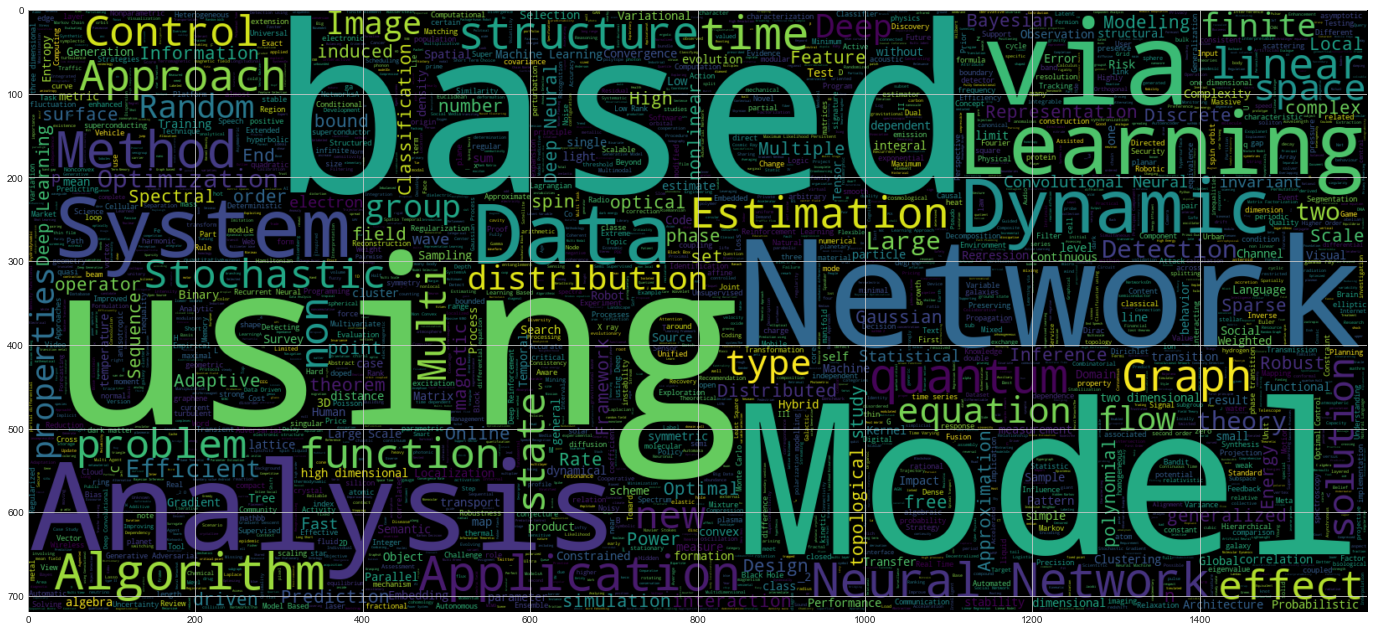

In [34]:
plt.figure(figsize=(24,20))

world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(df_train.Texto))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

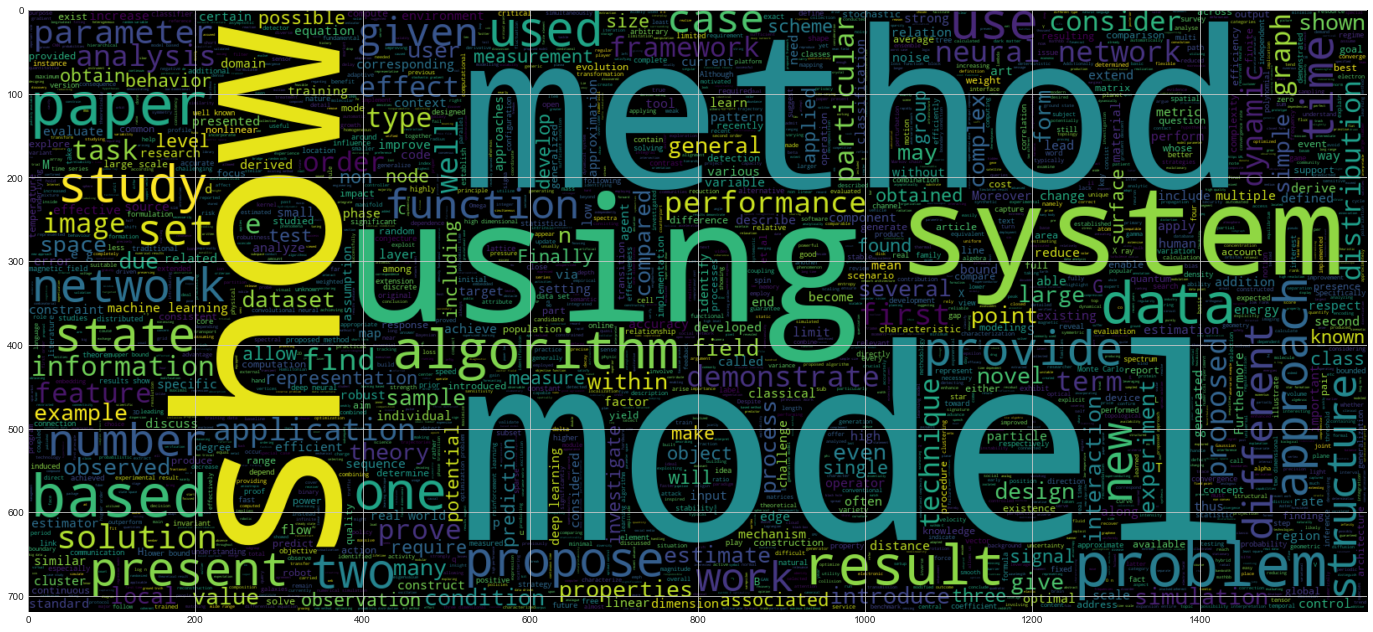

In [35]:
plt.figure(figsize=(24,20))

world_cloud_postive=WordCloud(min_font_size=3,max_words=3200,width=1600,height=720).generate("".join(df_train.Sub_texto))
plt.imshow(world_cloud_postive,interpolation='bilinear')
ax.grid(False)

# Pré-processamento

In [36]:
x = df_train[["Ciência_da_computação", "Fisica", "Matematica", "Estatistica", "Biologia_Quantitativa", "Finança_quantitativa"]]
x

Ciência_da_computação  Fisica  Matematica  Estatistica  \
0                          1       0           0            0   
1                          1       0           0            0   
2                          0       0           1            0   
3                          0       0           1            0   
4                          1       0           0            1   
...                      ...     ...         ...          ...   
20967                      1       1           0            0   
20968                      0       1           0            0   
20969                      1       0           0            0   
20970                      0       0           1            1   
20971                      0       0           1            1   

       Biologia_Quantitativa  Finança_quantitativa  
0                          0                     0  
1                          0                     0  
2                          0                     0  
3                          0                     0  
4                          0                     0  
...                      ...                   ...  
20967                      0                     0  
20968                      0                     0  
20969                      0                     0  
20970                      0                     0  
20971                      0                     0  

[20972 rows x 6 columns]

In [37]:
# Variável para teste
treino = df_train["Texto"]

# Variável para treino
teste = df_train["Biologia_Quantitativa"]

In [38]:
# Dados de limpeza para modelo PLN

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Removendo stop words
def remove_stop_words(instancia):
    stopwords = set(nltk.corpus.stopwords.words("english"))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# stemming no dataset
def text_stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()

    palavras = []

    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

# Limpando base de dados
def dados_limpos(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

# Redução de palavras flexionadas
def Lemmatization(instancia):
    
    palavras = []
    
    for w in instancia.split():
        palavras.append(wordnet_lemmatizer.lemmatize(w))
        return (" ".join(palavras))

# Pré-processamento removendo stopword e removendo caracteres indesejados.
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [39]:
# Visualizando texto
treino = [Preprocessing(i) for i in treino]
treino[:20]

['reconstructing subjectspecific effect maps',
 'rotation invariance neural network',
 'spherical polyharmonics and poisson kernels polyharmonic functions',
 'finite element approximation the stochastic maxwelllandaulifshitzgilbert system',
 'comparative study of discrete wavelet transforms and wavelet tensor train decomposition to feature extraction of ftir data of medicinal plants',
 'on maximizing the fundamental frequency of the complement of an obstacle',
 'on the rotation period and shape of the hyperbolic asteroid 1i/`oumuamua (2017 u1 from its lightcurve',
 'adverse effects of polymer coating on heat transport at solidliquid interface',
 'sph calculations of marsscale collisions the role of the equation of state, material rheologies, and numerical effects',
 '$\\mathcal{r}_{0}$ fails to predict the outbreak potential in the presence of naturalboosting immunity',
 'global sensitivity analysis and reduced order models hydraulicallyfractured horizontal wells',
 'roleseparating ord

In [40]:
# Word tokenize - E o processo de devidir uma string, textos e uma lista tokens 
# Modelo criado para classificar tweets positivos, negativos
# CountVectorizer criar um vocabulário de palavras e retornar em vetor

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()
vectorizer = CountVectorizer(analyzer="word", tokenizer = tokenizer.tokenize)
freq = vectorizer.fit_transform(treino)
freq.shape

(20972, 23881)

In [41]:
# Treinando modelo machine learning e treino do modelo
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(freq, teste, test_size = 0.3, random_state = 0)

In [42]:
# Total de linhas e colunas e linhas dos dados de treino x
x_train.shape

(14680, 23881)

In [43]:
# Total de linhas dos dados de treino y
y_train.shape

(14680,)

In [44]:
# Total de linhas e colunas dos dados de treino x teste 
x_test.shape

(6292, 23881)

In [45]:
# Total de linhas e colunas dos dados de treino y teste 
y_test.shape

(6292,)

In [46]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_modelo = KNeighborsClassifier() # Nome do algoritmo M.L
knn_modelo_fit = knn_modelo.fit(x_train, y_train) # Treinamento do modelo
knn_modelo_score_1 = knn_modelo.score(x_train, y_train) # Score do modelo dados treino x
knn_modelo_score_2 = knn_modelo.score(x_train, y_train) # Score do modelo dados treino y

print("Treinamento base treino:", knn_modelo_score_1)
print("Treinamento base teste:", knn_modelo_score_2)

Treinamento base treino: 0.9720708446866485
Treinamento base teste: 0.9720708446866485
Wall time: 12.1 s


In [47]:
# Previsão do modelo
knn_modelo_pred = knn_modelo.predict(x_test)
knn_modelo_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
# Accuracy do modelo - K-NN
from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, knn_modelo_pred)
print("Accuracy - K-NN: %.2f" % (accuracy_knn * 100))

Accuracy - K-NN: 97.25


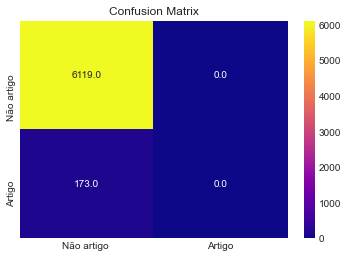

<Figure size 3636x1440 with 0 Axes>

In [49]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

matrix_confusion_1 = confusion_matrix(y_test, knn_modelo_pred)

ax= plt.subplot()
sns.heatmap(matrix_confusion_1, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 
plt.figure(figsize=(50.5, 20))
ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Não artigo ", "Artigo"]); ax.yaxis.set_ticklabels(["Não artigo ", "Artigo"]);

roc_auc 0.5491886826496075


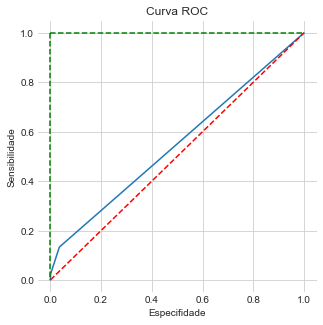

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

roc = knn_modelo.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [51]:
from sklearn.metrics import classification_report

classification = classification_report(y_test, knn_modelo_pred)
print("Modelo -  KNN Classifier")
print()
print(classification)

Modelo -  KNN Classifier

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6119
           1       0.00      0.00      0.00       173

    accuracy                           0.97      6292
   macro avg       0.49      0.50      0.49      6292
weighted avg       0.95      0.97      0.96      6292



In [52]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

precision = precision_score(y_test, knn_modelo_pred)
Recall = recall_score(y_test, knn_modelo_pred)
Accuracy = accuracy_score(y_test, knn_modelo_pred)
F1_Score = f1_score(y_test, knn_modelo_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

Metricas  Resultado
2   Accuracy   0.972505
0  precision   0.000000
1     Recall   0.000000
3   F1_Score   0.000000

In [53]:
%%time
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr_fit = model_lr.fit(x_train, y_train)
model_lr_score = model_lr.score(x_train, y_train)

print("Modelo - Regressão logistica: %.2f" % (model_lr_score * 100))

Modelo - Regressão logistica: 98.40
Wall time: 321 ms


In [54]:
# Previsão do modelo

model_lr_pred = model_lr.predict(x_test)
model_lr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

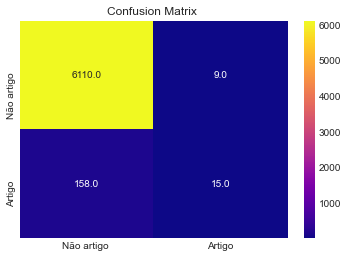

<Figure size 3636x1440 with 0 Axes>

In [55]:
matrix_confusion_1 = confusion_matrix(y_test, model_lr_pred)

ax= plt.subplot()
sns.heatmap(matrix_confusion_1, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 
plt.figure(figsize=(50.5, 20))
ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix '); 
ax.xaxis.set_ticklabels(["Não artigo ", "Artigo"]); ax.yaxis.set_ticklabels(["Não artigo", "Artigo"]);

In [56]:
# Accuracy do modelo
accuracy_regression_logistic = accuracy_score(y_test, model_lr_pred)

print("Accuracy - Logistic regression: %.2f" % (accuracy_regression_logistic * 100))

Accuracy - Logistic regression: 97.35


roc_auc 0.827376965709951


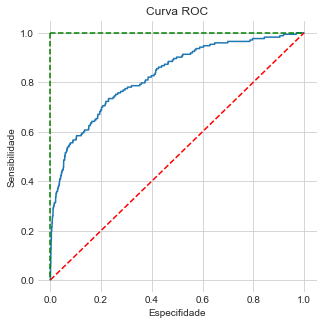

In [57]:
# A Curva roc

roc = model_lr.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [58]:
# Classification report

classification = classification_report(y_test, model_lr_pred)
print("Modelo -  Logistic Regression")
print()
print(classification)

Modelo -  Logistic Regression

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6119
           1       0.62      0.09      0.15       173

    accuracy                           0.97      6292
   macro avg       0.80      0.54      0.57      6292
weighted avg       0.97      0.97      0.96      6292



In [59]:
precision = precision_score(y_test, model_lr_pred)
Recall = recall_score(y_test, model_lr_pred)
Accuracy = accuracy_score(y_test, model_lr_pred)
F1_Score = f1_score(y_test, model_lr_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

Metricas  Resultado
2   Accuracy   0.973458
0  precision   0.625000
3   F1_Score   0.152284
1     Recall   0.086705

In [60]:
%%time
from sklearn.tree import DecisionTreeClassifier

modelo_arvore_cla_1 = DecisionTreeClassifier(max_depth=4, random_state=0)
modelo_arvore_cla_fit = modelo_arvore_cla_1.fit(x_train, y_train)
modelo_arvore_scor = modelo_arvore_cla_1.score(x_train, y_train)

print("Modelo - Decision Tree Classifier: %.2f" % (modelo_arvore_scor * 100))

Modelo - Decision Tree Classifier: 97.37
Wall time: 336 ms


In [61]:
# Previsão do modelo

modelo_arvore_pred = modelo_arvore_cla_1.predict(x_test)
modelo_arvore_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
# Accuracy do modelo previsão
accuracy_decision_tree = accuracy_score(y_test, modelo_arvore_pred)

print("Acuracia - Decision Tree: %.2f" % (accuracy_decision_tree * 100))

Acuracia - Decision Tree: 97.23


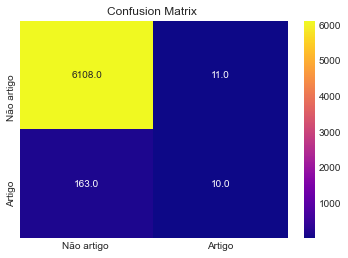

<Figure size 3636x1440 with 0 Axes>

In [63]:
matrix_confusion_1 = confusion_matrix(y_test, modelo_arvore_pred)

ax= plt.subplot()
sns.heatmap(matrix_confusion_1, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 
plt.figure(figsize=(50.5, 20))
ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix '); 
ax.xaxis.set_ticklabels(["Não artigo ", "Artigo"]); ax.yaxis.set_ticklabels(["Não artigo ", "Artigo"]);

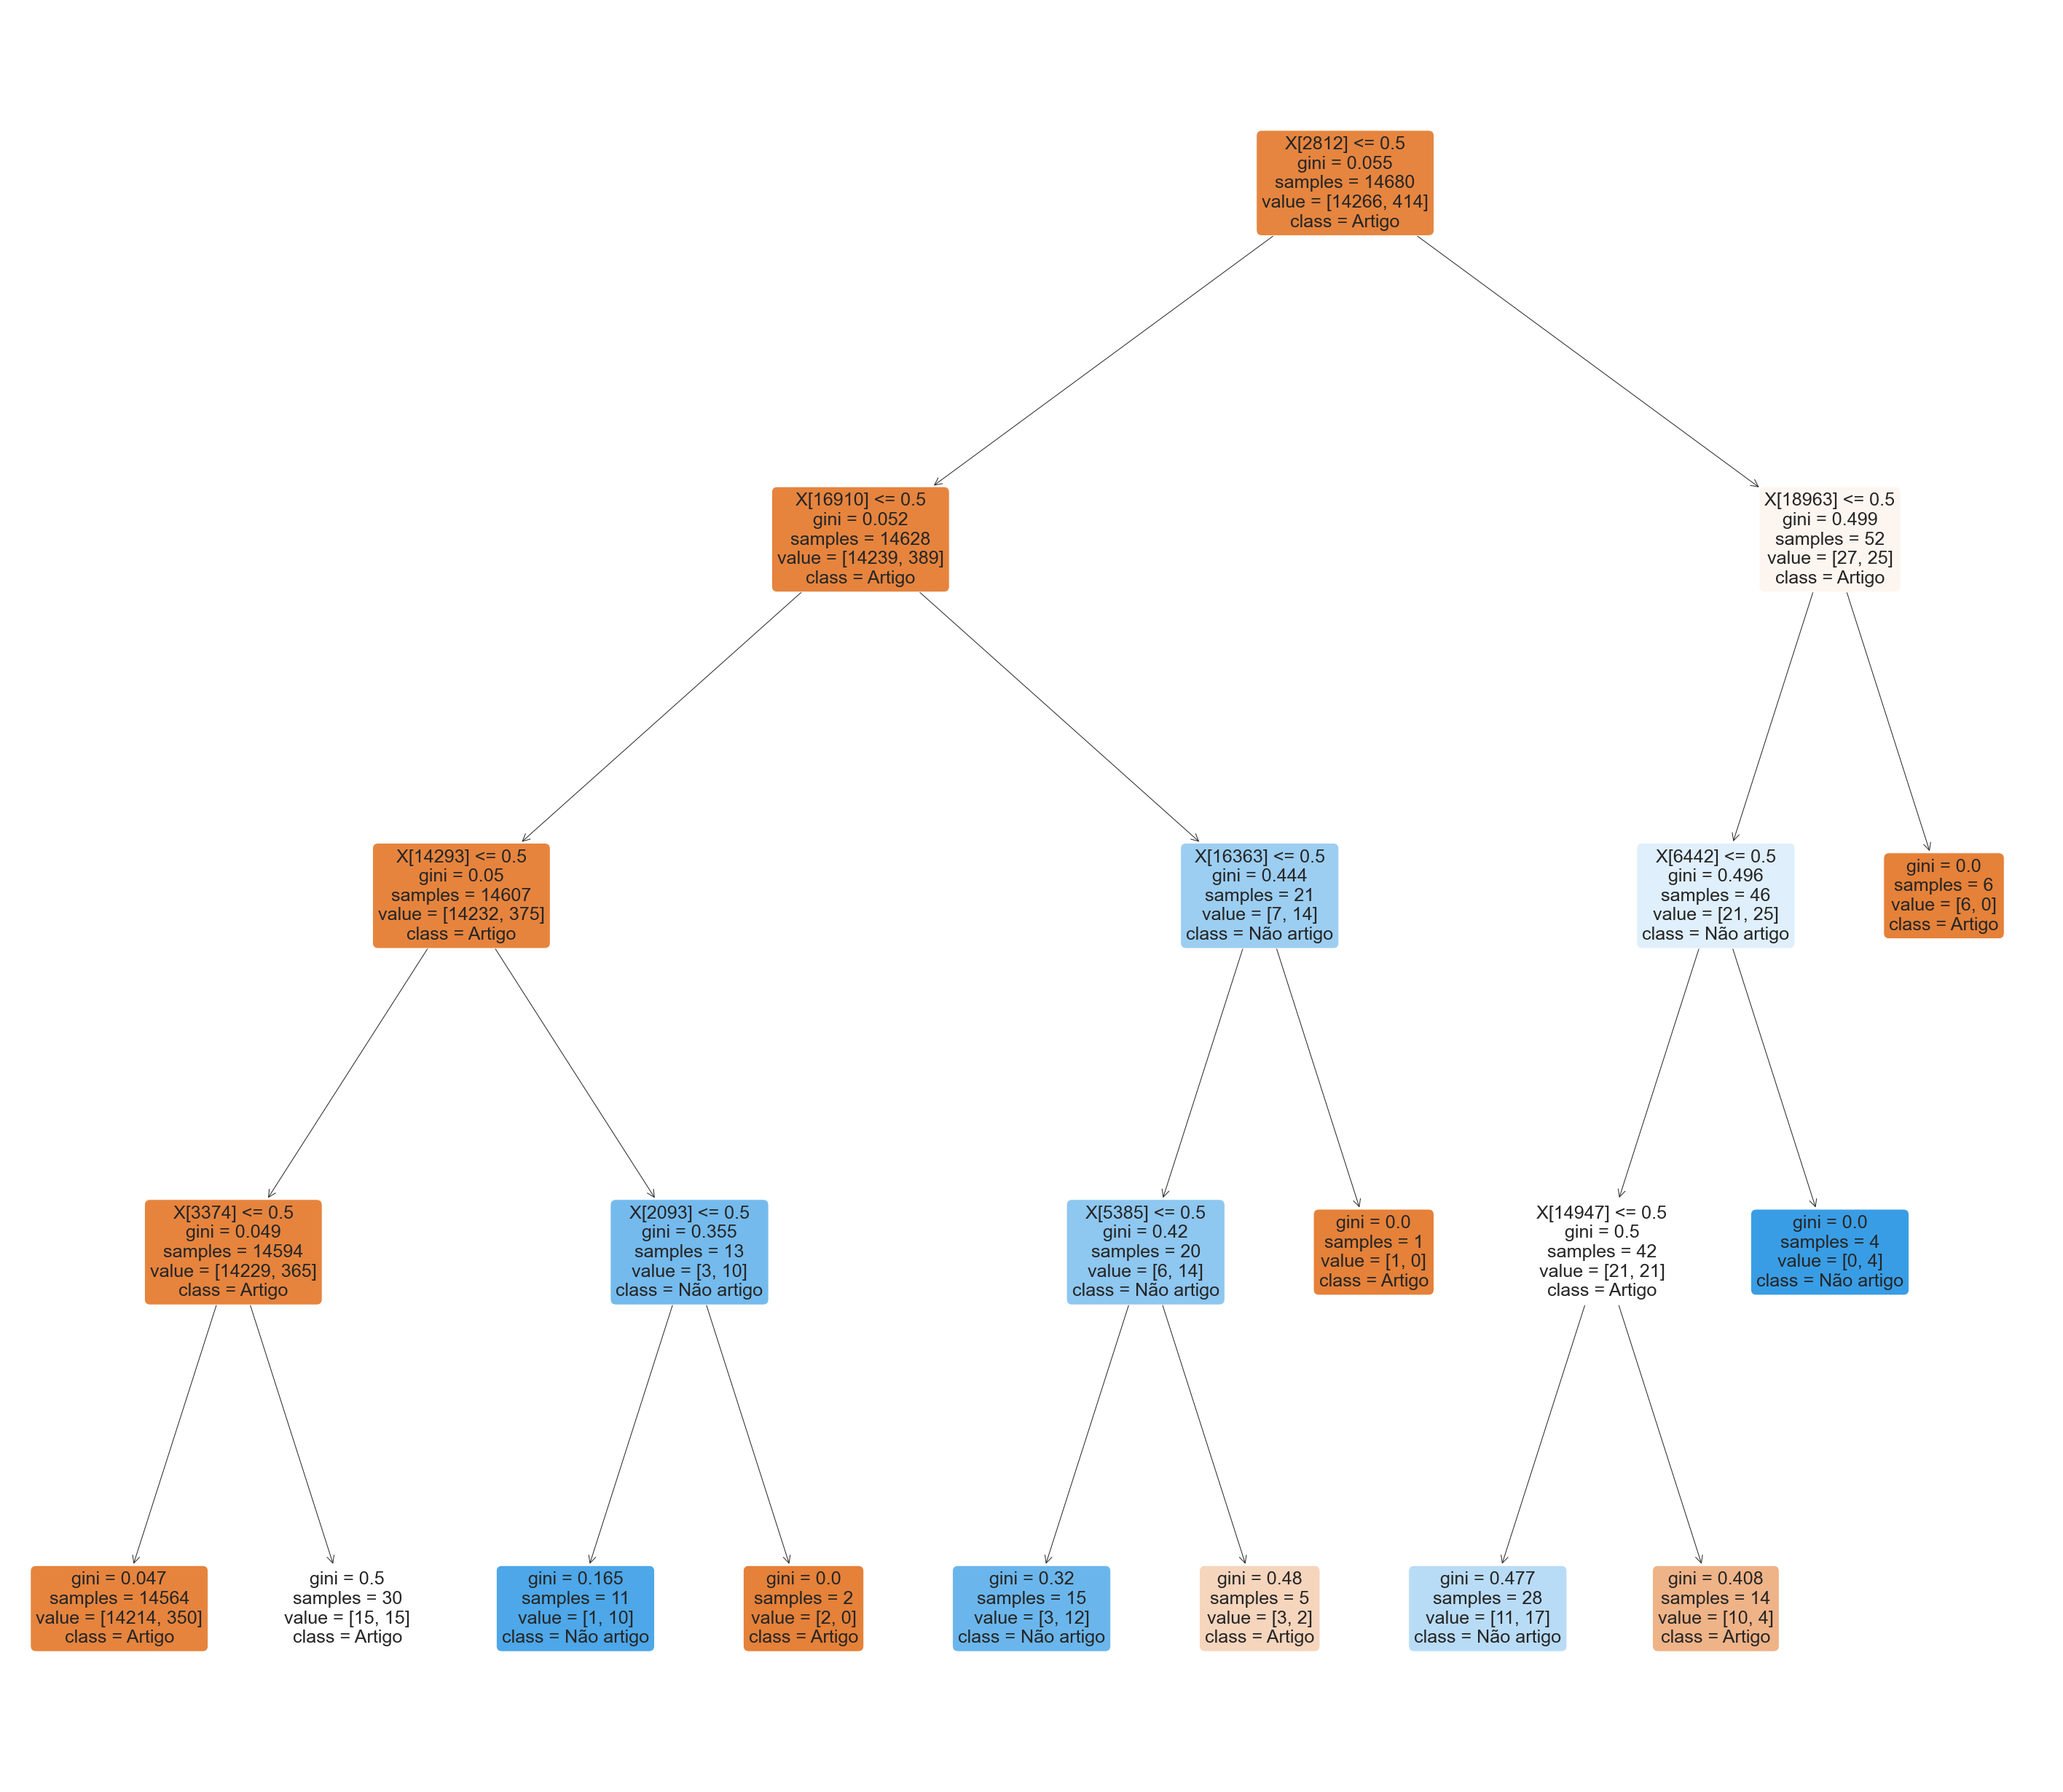

In [64]:
# Gráfico da árvore 
from sklearn import tree

fig, ax = plt.subplots(figsize=(50.5, 45), facecolor = "w")
tree.plot_tree(modelo_arvore_cla_1, 
               ax = ax, 
               fontsize = 25.18, 
               rounded = True, 
               filled = True, 
               class_names = ["Artigo", "Não artigo"])
plt.show()

roc_auc 0.538919333035452


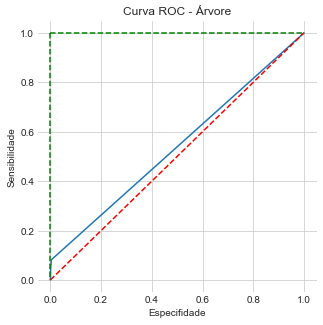

In [65]:
# Curva ROC - Árvore
roc = modelo_arvore_cla_1.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Árvore')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [66]:
# Classification report
class_report = classification_report(y_test, modelo_arvore_pred)
print("Modelo - Decision Tree")
print("\n")
print(class_report)

Modelo - Decision Tree


              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6119
           1       0.48      0.06      0.10       173

    accuracy                           0.97      6292
   macro avg       0.73      0.53      0.54      6292
weighted avg       0.96      0.97      0.96      6292



In [67]:
# Métricas do modelo
precision = precision_score(y_test, modelo_arvore_pred)
Recall = recall_score(y_test, modelo_arvore_pred)
Accuracy = accuracy_score(y_test, modelo_arvore_pred)
F1_Score = f1_score(y_test, modelo_arvore_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

Metricas  Resultado
2   Accuracy   0.972346
0  precision   0.476190
3   F1_Score   0.103093
1     Recall   0.057803

In [68]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

model_gradient_boosting = GradientBoostingClassifier()
model_gradient_boosting_fit = model_gradient_boosting.fit(x_train, y_train)
model_gradient_boosting_score = model_gradient_boosting.score(x_train, y_train)
print("Modelo - Naive Bayes: %.2f" % (model_gradient_boosting_score * 100))

Modelo - Naive Bayes: 98.64
Wall time: 33 s


In [69]:
# Previsão do modelo - Gradient Boosting

model_gradient_boosting_pred = model_gradient_boosting.predict(x_test)
model_gradient_boosting_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
# Accuracy do modelo 
accuracy_model_gradient_boosting = accuracy_score(y_test, model_gradient_boosting_pred)

print("Acurácia - Gradient boosting: %.2f" % (accuracy_model_gradient_boosting * 100))

Acurácia - Gradient boosting: 96.93


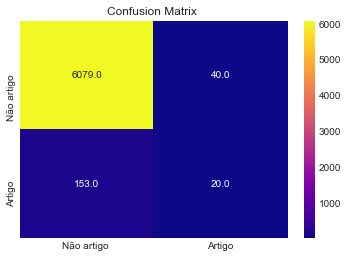

<Figure size 3636x1440 with 0 Axes>

In [71]:
matrix_confusion_1 = confusion_matrix(y_test, model_gradient_boosting_pred)

ax= plt.subplot()
sns.heatmap(matrix_confusion_1, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 
plt.figure(figsize=(50.5, 20))
ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix '); 
ax.xaxis.set_ticklabels(["Não artigo ", "Artigo"]); ax.yaxis.set_ticklabels(["Não artigo ", "Artigo"]);

roc_auc 0.644613054949664


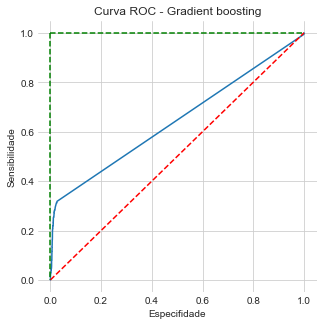

In [72]:
# Curva ROC - Gradient boosting
roc = model_gradient_boosting.predict_proba(x_test)[:,1]
tfp, tvp, limite = roc_curve(y_test, roc)
print('roc_auc', roc_auc_score(y_test, roc))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC - Gradient boosting')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red')
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green')
plt.show()

In [73]:
# Classification report
classification = classification_report(y_test, model_gradient_boosting_pred)

print("Modelo 05 - Gradient boosting")
print("\n")
print(classification)

Modelo 05 - Gradient boosting


              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6119
           1       0.33      0.12      0.17       173

    accuracy                           0.97      6292
   macro avg       0.65      0.55      0.58      6292
weighted avg       0.96      0.97      0.96      6292



In [74]:
# Métricas do modelo 
precision = precision_score(y_test, model_gradient_boosting_pred)
Recall = recall_score(y_test, model_gradient_boosting_pred)
Accuracy = accuracy_score(y_test, model_gradient_boosting_pred)
F1_Score = f1_score(y_test, model_gradient_boosting_pred)

precisao = pd.DataFrame({
    
    "Metricas" : ["precision",
                 "Recall", 
                  "Accuracy", 
                  "F1_Score"],
    
    "Resultado": [precision,
                Recall, 
                Accuracy, 
                F1_Score]})

precisao.sort_values(by = "Resultado", ascending = False)

Metricas  Resultado
2   Accuracy   0.969326
0  precision   0.333333
3   F1_Score   0.171674
1     Recall   0.115607

In [75]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["K-NN", 
               "Regression Logistic", 
               "Decision tree", 
               "Gradient boosting"],

    "Acurácia" :[accuracy_knn, 
                 accuracy_regression_logistic, 
                 accuracy_decision_tree,
                 accuracy_model_gradient_boosting]})

modelos_1 = modelos.sort_values(by = "Acurácia", ascending = False)
modelos_1.to_csv("modelos_1.csv")
modelos_1

Models  Acurácia
1  Regression Logistic  0.973458
0                 K-NN  0.972505
2        Decision tree  0.972346
3    Gradient boosting  0.969326

In [76]:
# Salvando modelo Machine learning

import pickle    
    
with open('model_lr_pred.pkl', 'wb') as file:
    pickle.dump(model_lr_pred, file)
        
with open('model_gradient_boosting_pred.pkl', 'wb') as file:
    pickle.dump(model_gradient_boosting_pred, file)